## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# focus on data we are interested in
drug_results = mouse_study_df.loc[:,["Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
drug_results

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Ramicane,0,45.000000
1,Ramicane,5,38.825898
2,Ramicane,10,35.014271
3,Ramicane,15,34.223992
4,Ramicane,20,32.997729
...,...,...,...
1888,Naftisol,25,63.145652
1889,Naftisol,30,65.841013
1890,Naftisol,35,69.176246
1891,Naftisol,40,70.314904


## Summary statistics

In [6]:
# calculate mean, median, variance, standard deviation, and SEM of the tumor volume
tumor_mean = drug_results.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = drug_results.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_var = drug_results.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_sem = drug_results.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
tumor_std = drug_results.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = pd.DataFrame({"Average Tumor Volume (mm3)": tumor_mean,
                       "Median Tumor Volume (mm3)": tumor_median,
                       "Variance": tumor_var,
                       "Standard Deviation": tumor_std,
                       "Standard Error": tumor_sem})
# formatting
summary["Average Tumor Volume (mm3)"] = summary["Average Tumor Volume (mm3)"].map("{:.2f}".format)
summary["Median Tumor Volume (mm3)"] = summary["Median Tumor Volume (mm3)"].map("{:.2f}".format)
summary["Variance"] = summary["Variance"].map("{:.2f}".format)
summary["Standard Deviation"] = summary["Standard Deviation"].map("{:.2f}".format)
summary["Standard Error"] = summary["Standard Error"].map("{:.2f}".format)

# print dataframe
summary

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

In [7]:
# data_counts_pd = drug_results("Drug Regimen").value_counts()
# TypeError: 'DataFrame' object is not callable
data_counts = drug_results.groupby("Drug Regimen").count()["Timepoint"]

Text(0.5, 1.0, 'Data Points Count for Each Treatment Regimen')

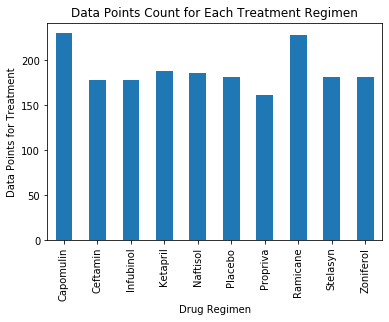

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# count data points
data_counts = drug_results.groupby("Drug Regimen").count()["Timepoint"]

# create bar plot using pandas
pandas_bar = data_counts.plot(kind="bar")
#data_counts.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("Data Points for Treatment")
pandas_bar.set_title("Data Points Count for Each Treatment Regimen")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

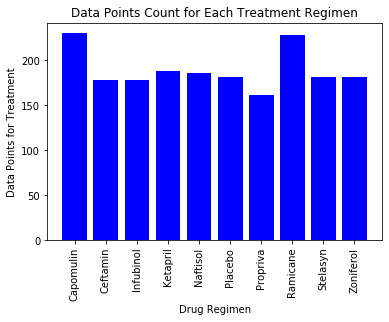

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# count data points
data_counts = pd.DataFrame(drug_results.groupby("Drug Regimen").count()["Timepoint"])
data_counts
#drugs = drug_results("Drug Regimen").count()
plt.bar(data_counts.index, data_counts["Timepoint"], color="b", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points for Treatment")
plt.title("Data Points Count for Each Treatment Regimen")
plt.xticks(rotation=90)

## Pie plots

In [10]:
# focus data on female and male mice
gender = mouse_study_df.loc[:,["Mouse ID", "Sex"]].drop_duplicates("Mouse ID")
gender_counts = gender["Sex"].value_counts()

Text(0.5, 1.0, 'Gender Distribution of Tested Mice')

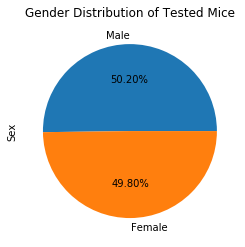

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pd = gender_counts.plot(kind="pie", autopct="%.2f%%")
gender_pd.set_title("Gender Distribution of Tested Mice")

Text(0.5, 1.0, 'Gender Distribution of Tested Mice')

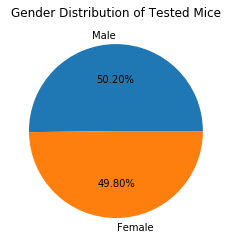

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = gender["Sex"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct="%.2f%%")
plt.title("Gender Distribution of Tested Mice")

## Quartiles, outliers and boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
best_performers = mouse_study_df.loc[mouse_study_df["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
final_best = best_performers[best_performers.Timepoint == 45]
final_best

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# final for capomulin
capomulin = mouse_study_df.loc[mouse_study_df["Drug Regimen"].isin(["Capomulin"])]
final_capomulin = (capomulin[capomulin.Timepoint == 45])
# iqr for capomulin
cap_quart = final_capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cap_lowerq = cap_quart[.25]
cap_upperq = cap_quart[.75]
cap_iqr = cap_upperq-cap_lowerq
# find potential outliers for Capomulin
cap_low_bound = cap_lowerq-(1.5*cap_iqr)
cap_upper_bound = cap_upperq+(1.5*cap_iqr)
print(f"Values below {cap_low_bound} could be outliers for Capomulin.")
print(f"Values above {cap_upper_bound} could be outliers for Capomulin.\n")

# final for Ramicane
ramicane = mouse_study_df.loc[mouse_study_df["Drug Regimen"].isin(["Ramicane"])]
final_ramicane = (ramicane[ramicane.Timepoint == 45])
# iqr for Ramicane
ram_quart = final_ramicane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ram_lowerq = ram_quart[.25]
ram_upperq = ram_quart[.75]
ram_iqr = ram_upperq-ram_lowerq
# find potential outliers for Ramicane
ram_low_bound = ram_lowerq-(1.5*ram_iqr)
ram_upper_bound = ram_upperq+(1.5*ram_iqr)
print(f"Values below {ram_low_bound} could be outliers for Ramicane.")
print(f"Values above {ram_upper_bound} could be outliers for Ramicane.\n")

# final for Infubinol
infubinol = mouse_study_df.loc[mouse_study_df["Drug Regimen"].isin(["Infubinol"])]
final_infubinol = (infubinol[infubinol.Timepoint == 45])
# iqr for Infubinol
inf_quart = final_infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
inf_lowerq = inf_quart[.25]
inf_upperq = inf_quart[.75]
inf_iqr = inf_upperq-inf_lowerq
# find potential outliers for Infubinol
inf_low_bound = inf_lowerq-(1.5*inf_iqr)
inf_upper_bound = inf_upperq+(1.5*inf_iqr)
print(f"Values below {inf_low_bound} could be outliers for Infubinol.")
print(f"Values above {inf_upper_bound} could be outliers for Infubinol.\n")

# final for Ceftamin
ceftamin = mouse_study_df.loc[mouse_study_df["Drug Regimen"].isin(["Ceftamin"])]
final_ceftamin = (ceftamin[ceftamin.Timepoint == 45])
# iqr for Ceftamin
cef_quart = final_ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cef_lowerq = cef_quart[.25]
cef_upperq = cef_quart[.75]
cef_iqr = cef_upperq-cef_lowerq
# find potential outliers for Ramicane
cef_low_bound = cef_lowerq-(1.5*cef_iqr)
cef_upper_bound = cef_upperq+(1.5*cef_iqr)
print(f"Values below {cef_low_bound} could be outliers for Ceftamin.")
print(f"Values above {cef_upper_bound} could be outliers for Ceftamin.")


Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.

Values below 19.690480101250003 could be outliers for Ramicane.
Values above 49.79900043124999 could be outliers for Ramicane.

Values below 55.35777559500001 could be outliers for Infubinol.
Values above 75.08224443499999 could be outliers for Infubinol.

Values below 52.29350701999999 could be outliers for Ceftamin.
Values above 76.66786758 could be outliers for Ceftamin.


In [16]:
# focus on tumor volume and drug regimen
focused_final = final_best.loc[:,["Drug Regimen","Tumor Volume (mm3)"]]

Text(0, 0.5, 'Final Tumor Volume (mm3)')

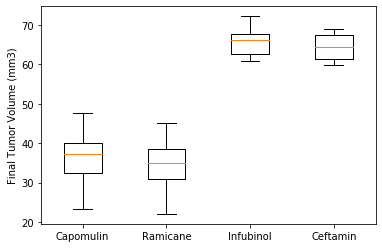

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#focus on the final data points for each drug individually
cap_final = focused_final.loc[final_best["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
ram_final = focused_final.loc[final_best["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
inf_final = focused_final.loc[final_best["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
cef_final = focused_final.loc[final_best["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]

# create a boxplot
plt.boxplot([cap_final, ram_final, inf_final, cef_final],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.title

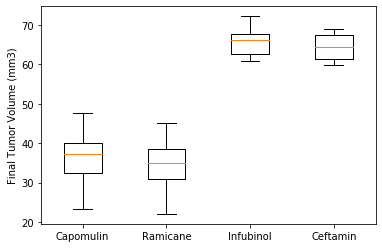

In [40]:
plt.boxplot([cap_final, ram_final, inf_final, cef_final],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

In [23]:
# find a single mouse to study
capomulin_stats = mouse_study_df.loc[mouse_study_df["Drug Regimen"].isin(["Capomulin"])]
# selecting mouse s185
cap_s185 = capomulin_stats.loc[capomulin_stats["Mouse ID"].isin(["s185"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0.5, 1.0, 'Tumor Volume (mm3) of Mouse s185 Over Time')

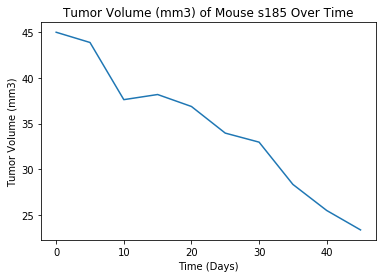

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(cap_s185["Timepoint"],cap_s185["Tumor Volume (mm3)"])
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) of Mouse s185 Over Time")

In [34]:
# calculate mean data for each mouse tested with Capomulin
cap_mean = capomulin_stats.groupby("Mouse ID").mean()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


Text(0.5, 1.0, 'Average Tumor Volume (mm3) versus Mouse Weight (g)')

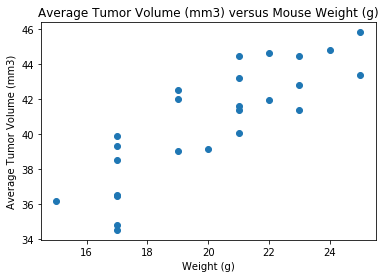

In [37]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(cap_mean["Weight (g)"], cap_mean["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume (mm3) versus Mouse Weight (g)")

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen